## Plotting

With the following code we can import the power dataset with the correct formatting and then plot it

In [1]:
# Importing packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pyarrow
from datetime import datetime, timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.seasonal import STL
import matplotlib.ticker as ticker
from matplotlib.colors import LinearSegmentedColormap

In [2]:
# Dataset import from CSV file
dataset_P = pd.read_csv('../PowerDataset_3_years.csv', index_col=0, parse_dates=True) # 2.5 years dataset
dataset_P

,r205n01,r205n02,r205n03,r205n04,r205n05,r205n06,r205n07,r205n08,r205n09,r205n10,...,r256n11,r256n12,r256n13,r256n14,r256n15,r256n16,r256n17,r256n18,r256n19,r256n20
timestamp,,,,,,,,,,,,,,,,,,,,,
2020-05-02 17:00:00+00:00,530.882353,20.000000,529.444444,550.606061,577.948718,528.611111,568.571429,669.487179,574.857143,547.297297,...,512.000000,525.294118,530.294118,527.837838,521.142857,530.285714,526.756757,561.315789,539.705882,526.000000
2020-05-02 18:00:00+00:00,532.025641,20.000000,529.042791,548.348292,575.650935,527.948171,571.401899,667.741604,573.162629,546.831131,...,511.356838,527.112341,530.396878,527.295592,520.331584,530.313347,527.160159,562.404254,539.750465,524.765520
2020-05-02 19:00:00+00:00,541.962608,20.000000,532.534305,554.683586,581.220896,527.629587,571.127541,670.140471,573.512427,547.244151,...,511.393428,525.655454,530.244126,528.170642,520.270270,530.186054,525.208819,560.954731,537.384654,525.631471
2020-05-02 20:00:00+00:00,544.268327,20.000000,532.654562,557.141766,586.214043,529.118962,571.603887,674.412953,576.784291,547.738046,...,511.756579,527.205914,530.569659,527.977996,520.715861,530.500481,524.167448,560.610850,537.646236,525.149199
2020-05-02 21:00:00+00:00,542.883504,20.000000,533.145359,556.479451,587.117900,528.839406,572.772164,675.122225,576.477301,548.337485,...,512.915703,529.027778,530.596706,529.074976,522.041521,530.186054,527.420255,563.308303,539.427887,525.096847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-28 18:00:00+00:00,532.969697,541.555556,526.484848,550.388889,576.042929,520.782828,571.000000,549.944444,566.535354,535.333333,...,1204.111111,841.996212,1155.944444,1583.000000,869.055556,1193.555556,779.055556,745.944444,1196.444444,1255.888889
2022-09-28 19:00:00+00:00,533.333333,541.111111,527.333333,550.611111,577.055556,520.333333,567.500000,549.333333,567.055556,536.277778,...,1205.000000,703.944444,1173.000000,1593.166667,868.833333,1196.000000,670.000000,635.777778,1201.000000,1251.611111
2022-09-28 20:00:00+00:00,532.555556,541.277778,526.555556,548.944444,575.722222,520.888889,570.000000,550.444444,566.166667,535.611111,...,1203.944444,863.444444,1175.166667,1587.444444,708.833333,1195.555556,610.888889,902.000000,1195.222222,1245.722222


In [3]:
# Function that plots a specific node or set of nodes
def showplot(dataset_node, ylabel, size, label):
    plt.figure(figsize=size)
    plt.tight_layout() 
    plt.grid(True)
    plt.gca().yaxis.labelpad = 10
    plt.ylabel(ylabel, fontweight='bold', fontsize=15)
    plt.xticks(fontweight='bold', fontsize=15)
    plt.yticks(fontweight='bold', fontsize=15)
    plt.title('Power', fontweight='bold', fontsize=15)
    plt.plot(dataset_node, linewidth=2, label=label)
    plt.legend(prop={'weight': 'bold', 'size': 15})
    plt.show

In [4]:
# Function that plots a specific node or set of nodes and then exports the plot as an image
def showplot_export(dataset_node, ylabel, size, label, file_name):
    plt.figure(figsize=size)
    plt.tight_layout() 
    plt.grid(True)
    plt.gca().yaxis.labelpad = 10
    plt.ylabel(ylabel, fontweight='bold', fontsize=15)
    plt.xticks(fontweight='bold', fontsize=15)
    plt.yticks(fontweight='bold', fontsize=15)
    plt.title('Power', fontweight='bold', fontsize=15)
    plt.plot(dataset_node, linewidth=2, label=label)
    plt.legend(prop={'weight': 'bold', 'size': 15})
    plt.gcf().set_facecolor('white')
    plt.savefig(file_name, dpi=300) # Code to export the plot as an image
    plt.show

In [5]:
# Function that exports the plot of a specific node or set of nodes, without plotting
def export_plot(dataset_node, ylabel, size, label, file_name):
    plt.figure(figsize=size)
    plt.tight_layout() 
    plt.grid(True)
    plt.gca().yaxis.labelpad = 10
    plt.ylabel(ylabel, fontweight='bold', fontsize=15)
    plt.xticks(fontweight='bold', fontsize=15)
    plt.yticks(fontweight='bold', fontsize=15)
    plt.title('Power', fontweight='bold', fontsize=15)
    plt.plot(dataset_node, linewidth=2, label=label)
    plt.legend(prop={'weight': 'bold', 'size': 15})
    plt.savefig(file_name, dpi=300) # Code to export the plot as an image

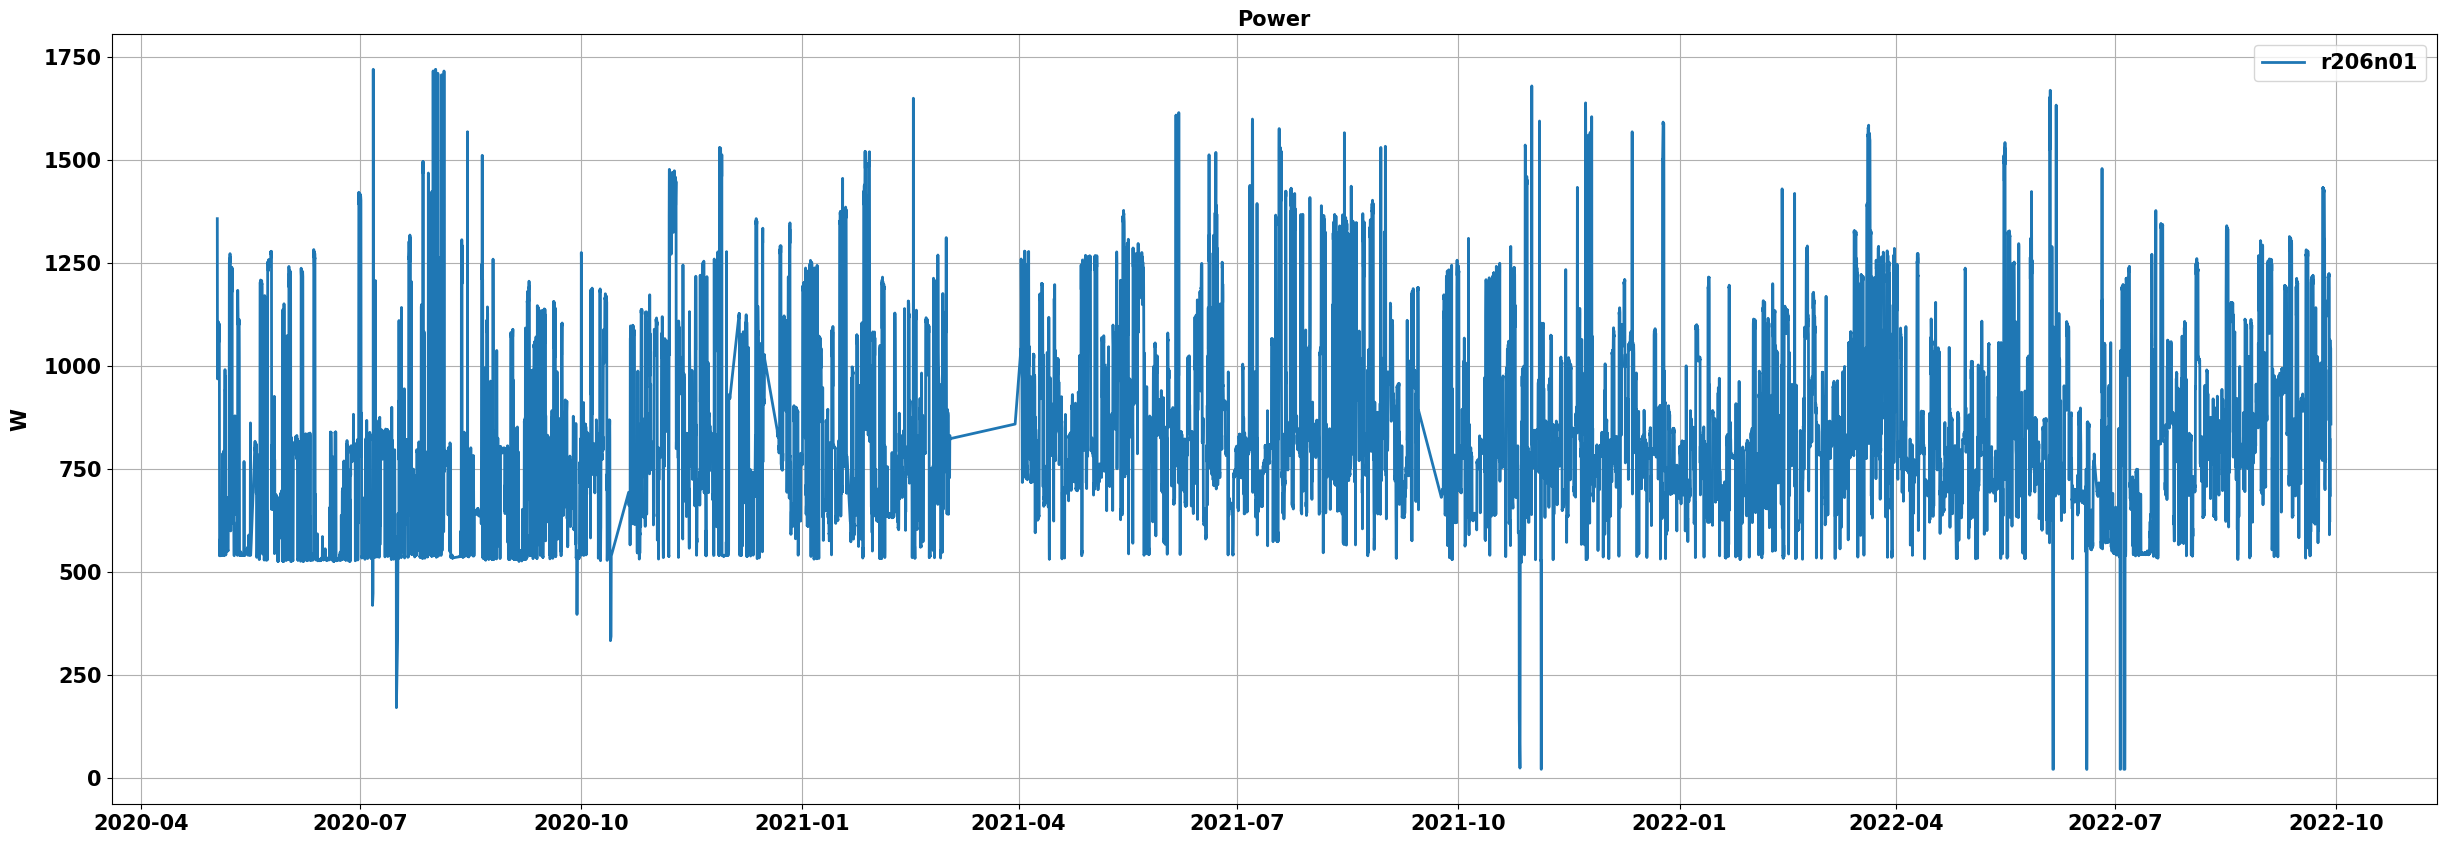

In [9]:
# Plotting specific nodes in time
showplot_export(dataset_P['r206n01'], 'W', (30,10), 'r206n01', '../PLOTS/PWR_r206n01.png') # 2.5 years dataset

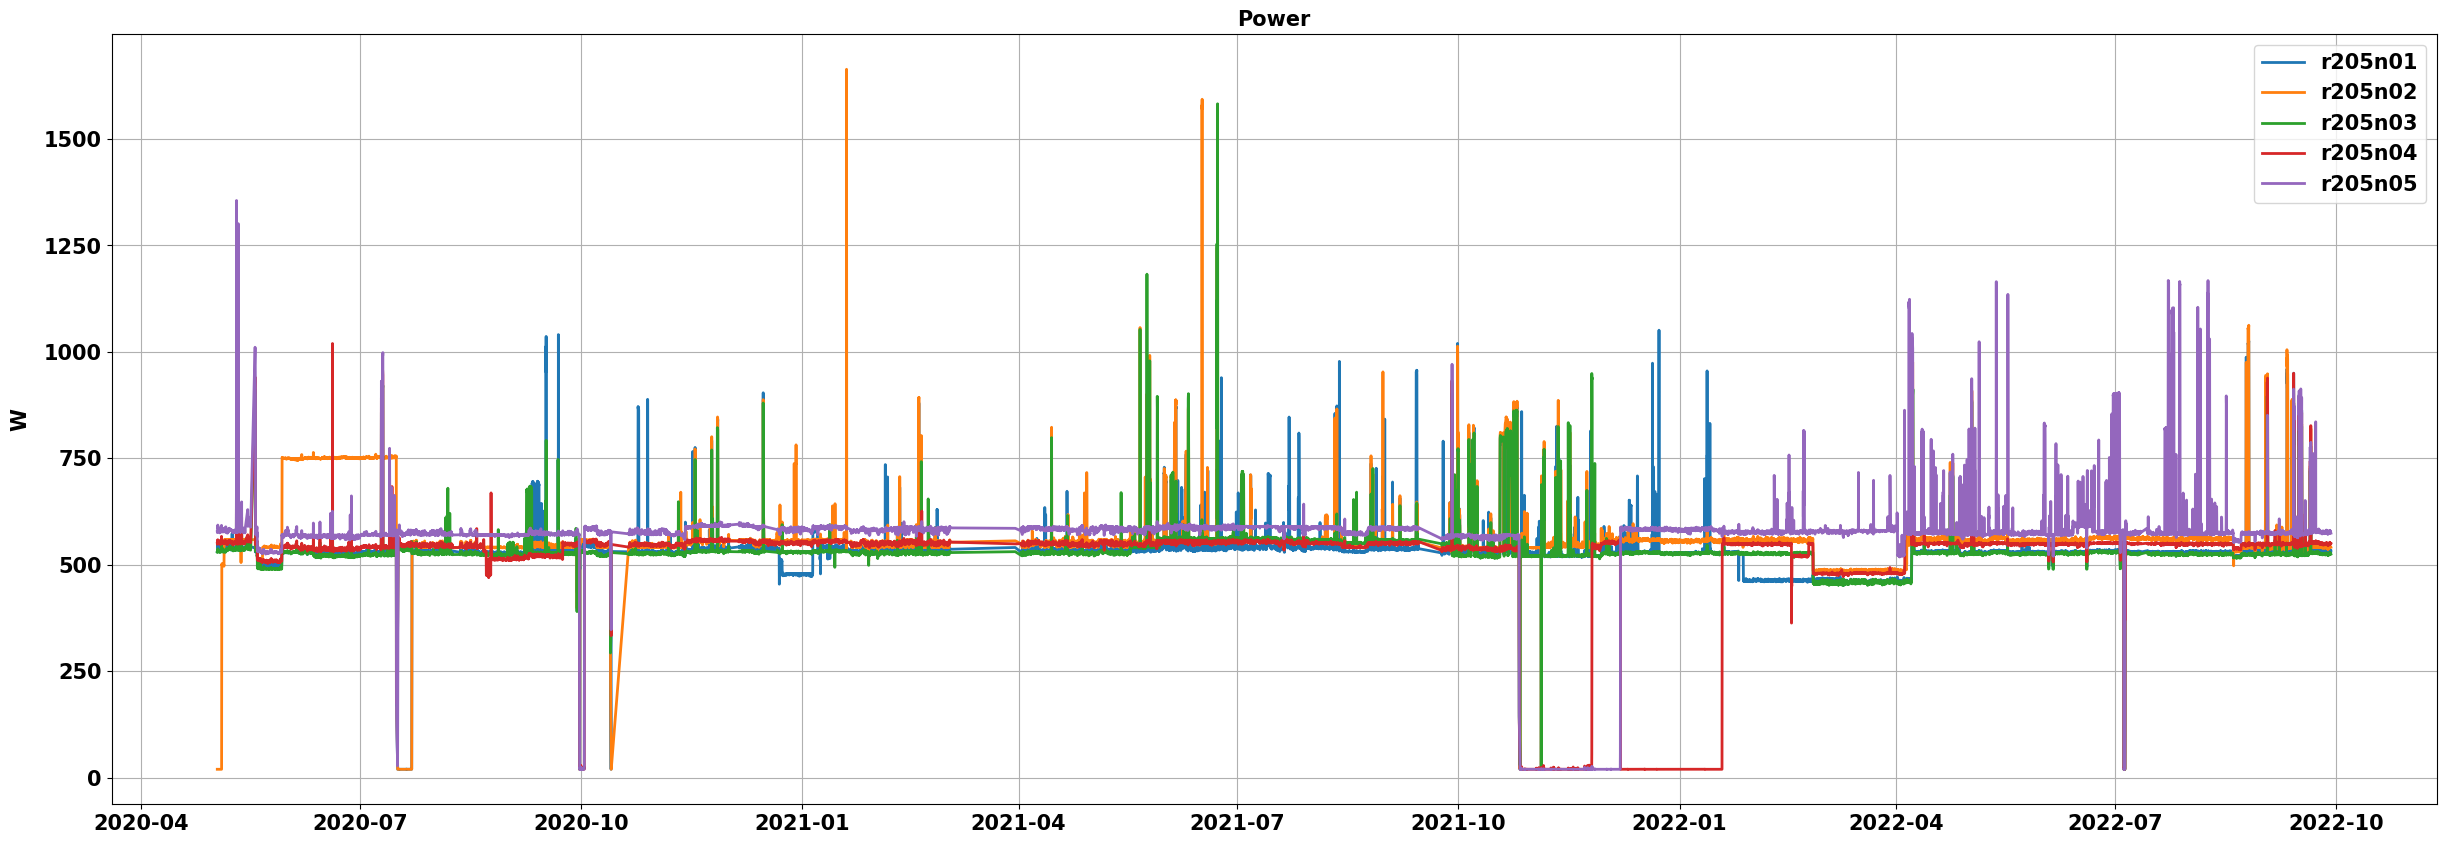

In [10]:
# Plotting a set of nodes in time
showplot(dataset_P.iloc[:, 0:5], 'W', (30,10), dataset_P.columns[0:5]) # 2.5 years dataset

# Plotting a portion in time of the dataset
#showplot(dataset_P.iloc[700:1500, 0], (20,10), dataset_P.columns[0])


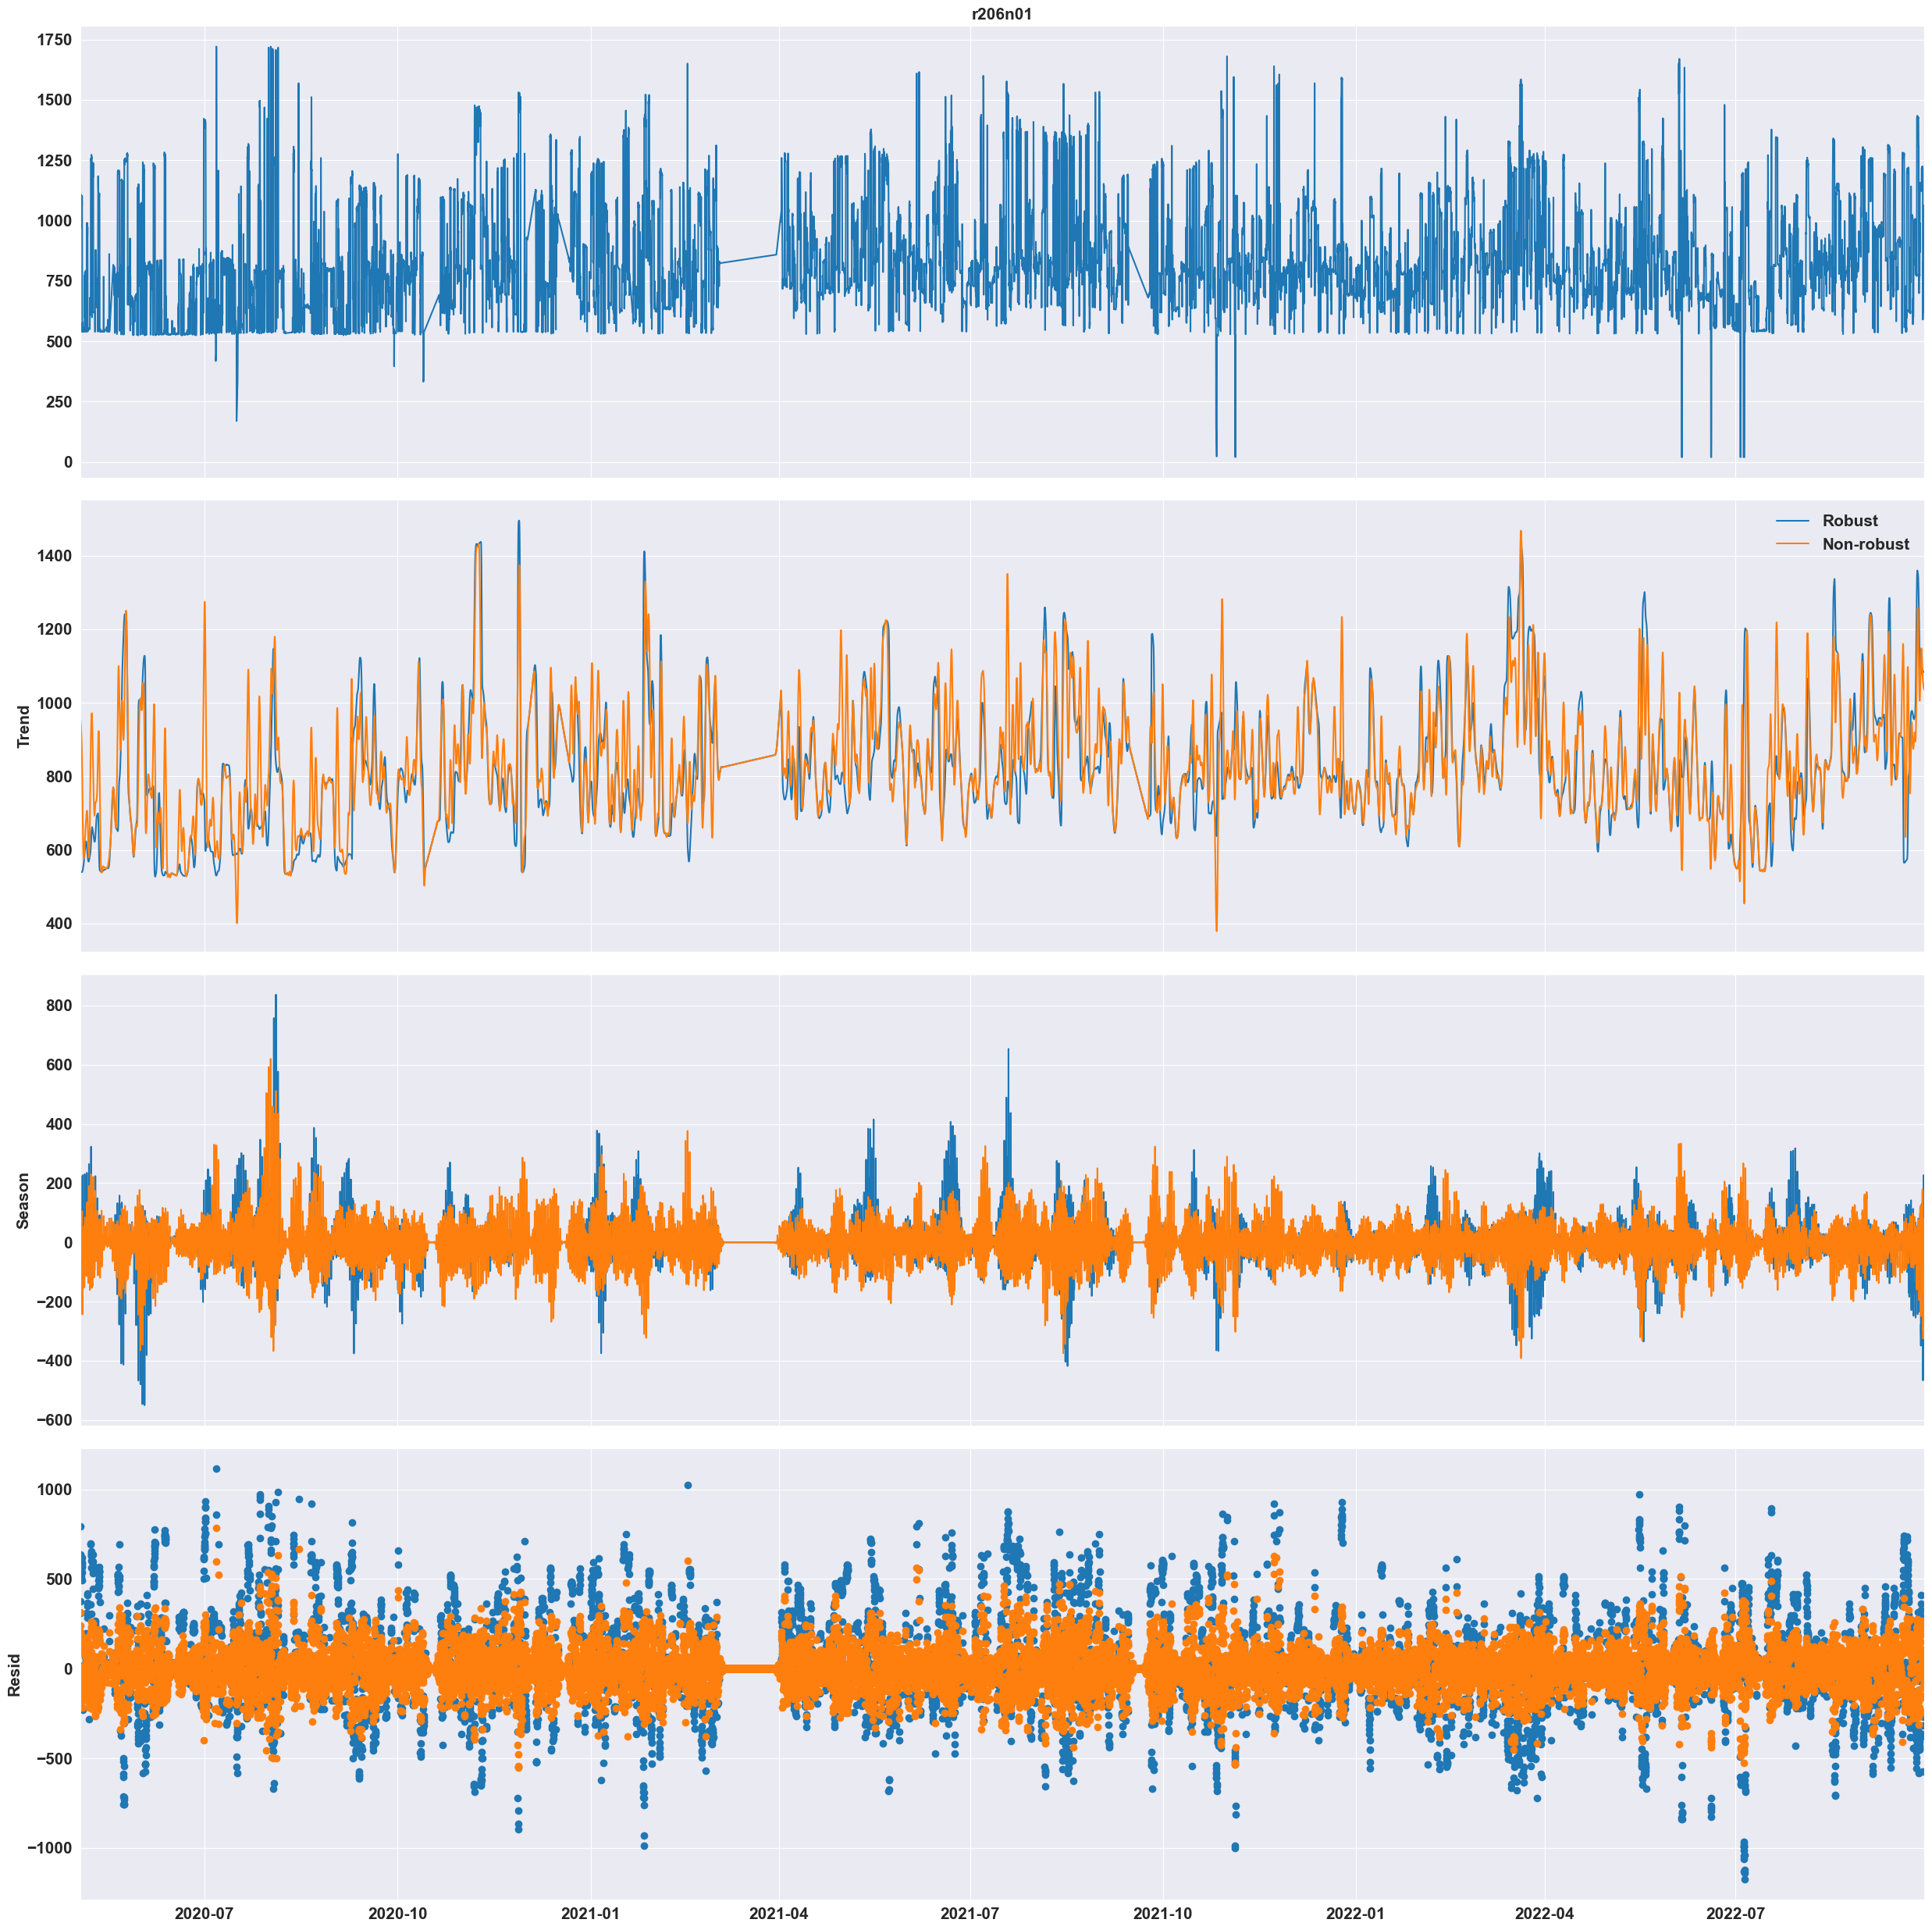

In [64]:
# Seasonal-Trend Decomposition for 2.5 years dataset
register_matplotlib_converters()
sns.set_style("darkgrid")

plt.rc("figure", figsize=(25, 25))
plt.rc("font", weight="bold", size=15)

def add_stl_plot(fig, res, legend):
    """Add 3 plots from a second STL fit"""
    axs = fig.get_axes()
    comps = ["trend", "seasonal", "resid"]
    for ax, comp in zip(axs[1:], comps):
        series = getattr(res, comp)
        if comp == "resid":
            ax.plot(series, marker="o", linestyle="none")
        else:
            ax.plot(series)
            if comp == "trend":
                ax.legend(legend, frameon=False)

stl = STL(dataset_P['r206n01'], period=24, robust=True)  # the period is set to one day
res_robust = stl.fit()
fig = res_robust.plot()
res_non_robust = STL(dataset_P['r206n01'], period=24, robust=False).fit()
add_stl_plot(fig, res_non_robust, ["Robust", "Non-robust"])

for ax in fig.get_axes():
    ax.set_title(ax.get_title(), fontweight='bold', fontsize=15)
    ax.set_ylabel(ax.get_ylabel(), fontweight='bold', fontsize=15)

plt.savefig('../PLOTS/PWR_stl_r206n01.png', dpi=300) # Code to export the plot as an image

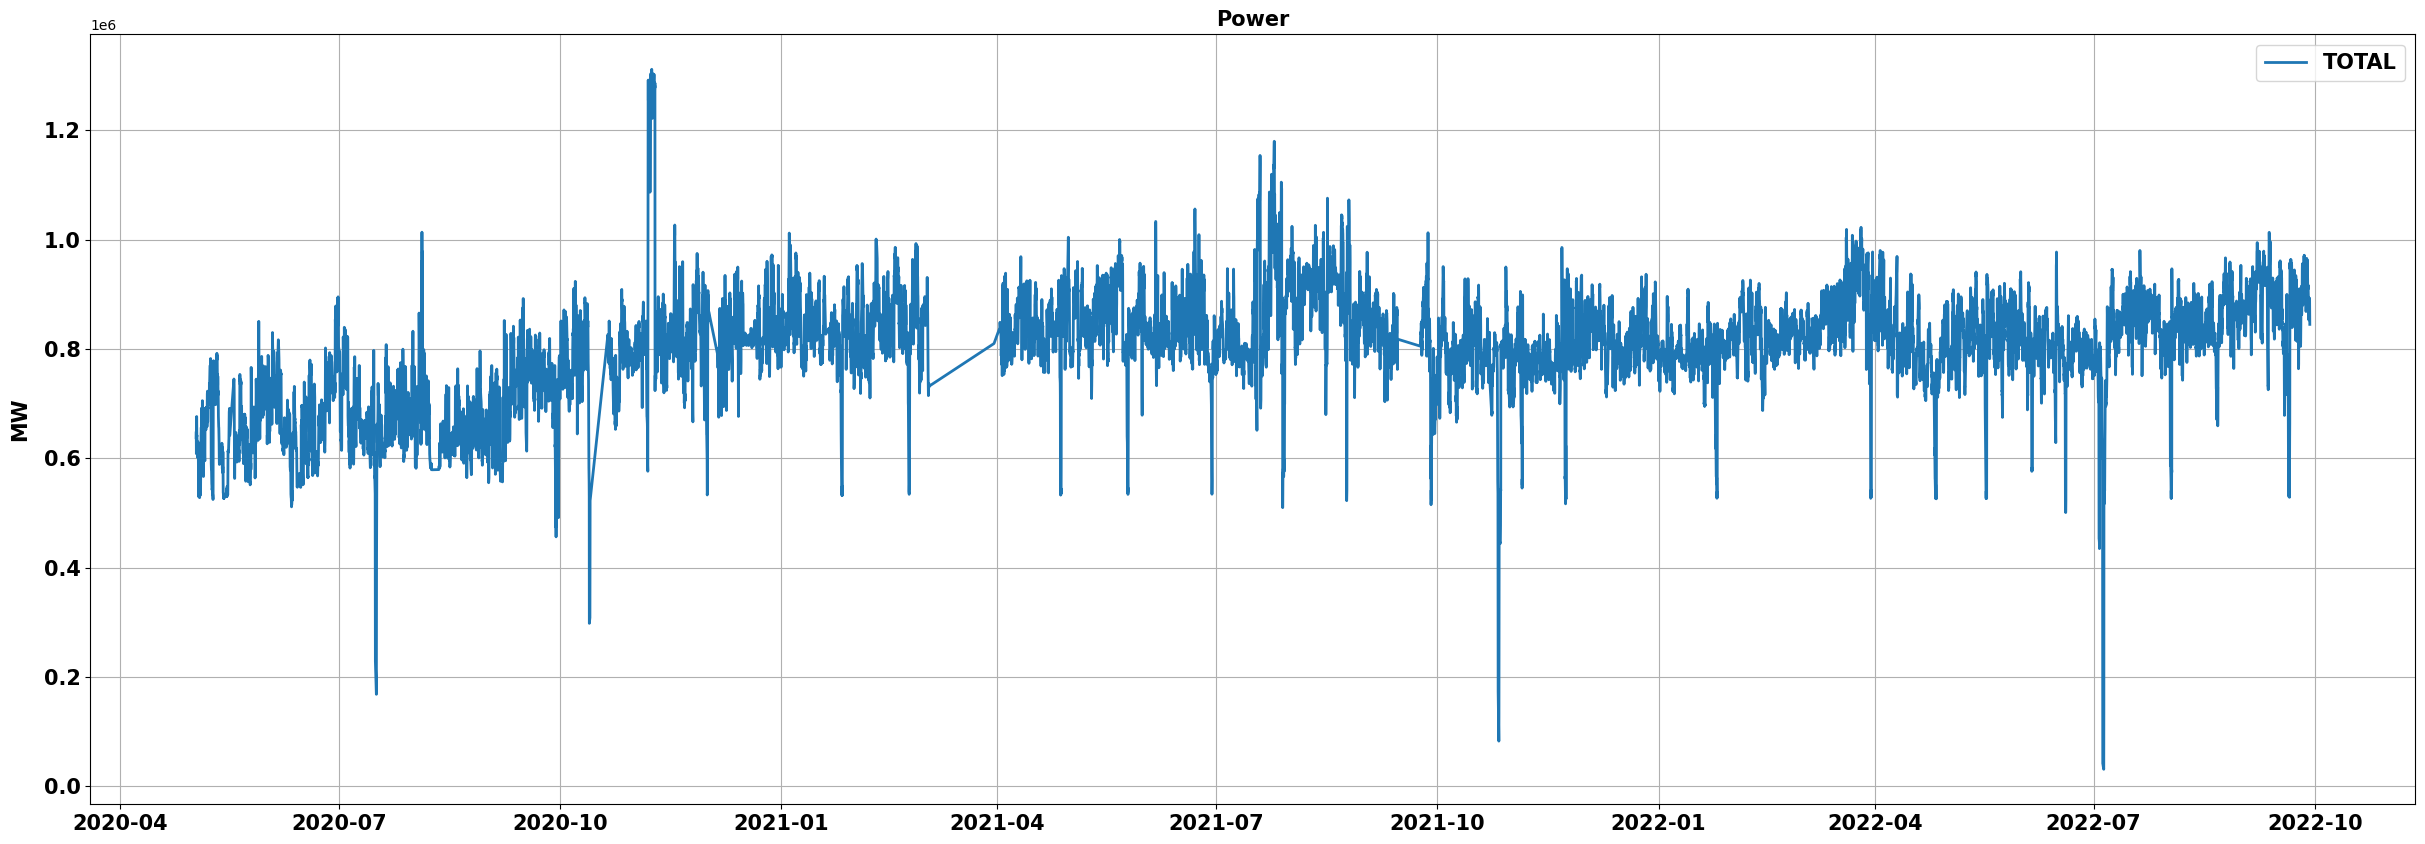

In [16]:
# To get (and plot) the total power consumption for all nodes, each sample of time
showplot_export(dataset_P.sum(axis=1), 'MW', (30,10), 'TOTAL', '../PLOTS/PWR_total.png')

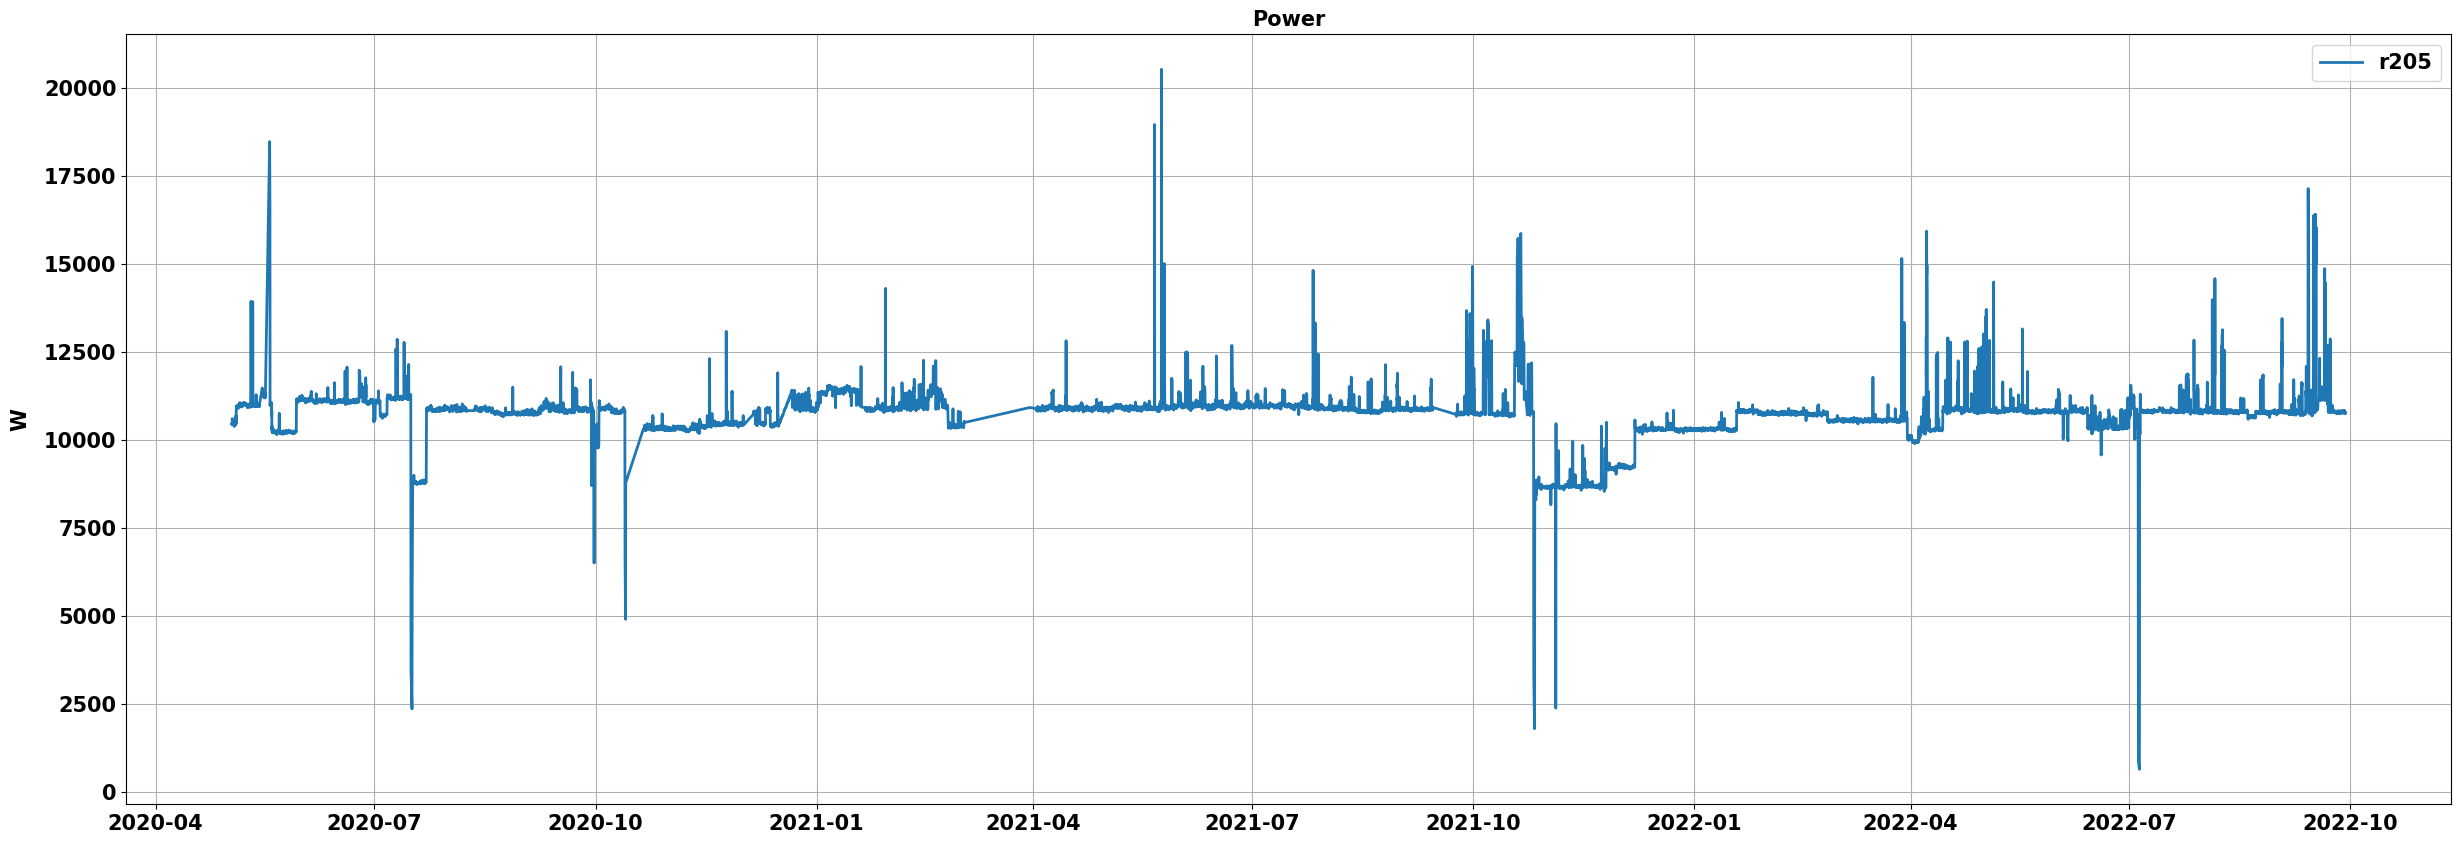

In [17]:
# Filter columns containing the number of the required rack in their names
rack = [col for col in dataset_P.columns if 'r205' in col]

# To plot the power consumption of specific racks
showplot_export(dataset_P[rack].sum(axis=1), 'W', (30,10), 'r205', '../PLOTS/PWR_r205.png')

In [18]:
%%capture 
# To avoid printing the output

# CELL THAT CREATES IMAGES FOR ALL RACKS, RUN ONLY IF NEEDED
for i in range(205, 257):
    rack_id = "r" + str(i)
    rack = [col for col in dataset_P.columns if rack_id in col]
    if not rack:
        continue # Skipping a cycle if the rack number isn't present
    export_plot(dataset_P[rack].sum(axis=1), 'W', (30,10), rack_id, f'../PLOTS/PWR_{rack_id}.png')
    

In [19]:
%%capture 
# To avoid printing the output

# CELL THAT CREATES IMAGES FOR ALL NODES in the same position in each rack, RUN ONLY IF NEEDED
for i in range(1, 21):
    if (i < 10):
        node_nbr = "n0" + str(i)
    else:
        node_nbr = "n" + str(i)
    node = [col for col in dataset_P.columns if node_nbr in col]
    if not node:
        continue # Skipping a cycle if the node number isn't present
    export_plot(dataset_P[node].sum(axis=1), 'W', (30,10), node_nbr, f'../PLOTS/PWR_{node_nbr}.png')

c:\Users\loren\miniconda3\envs\DeepLearning\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\loren\miniconda3\envs\DeepLearning\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


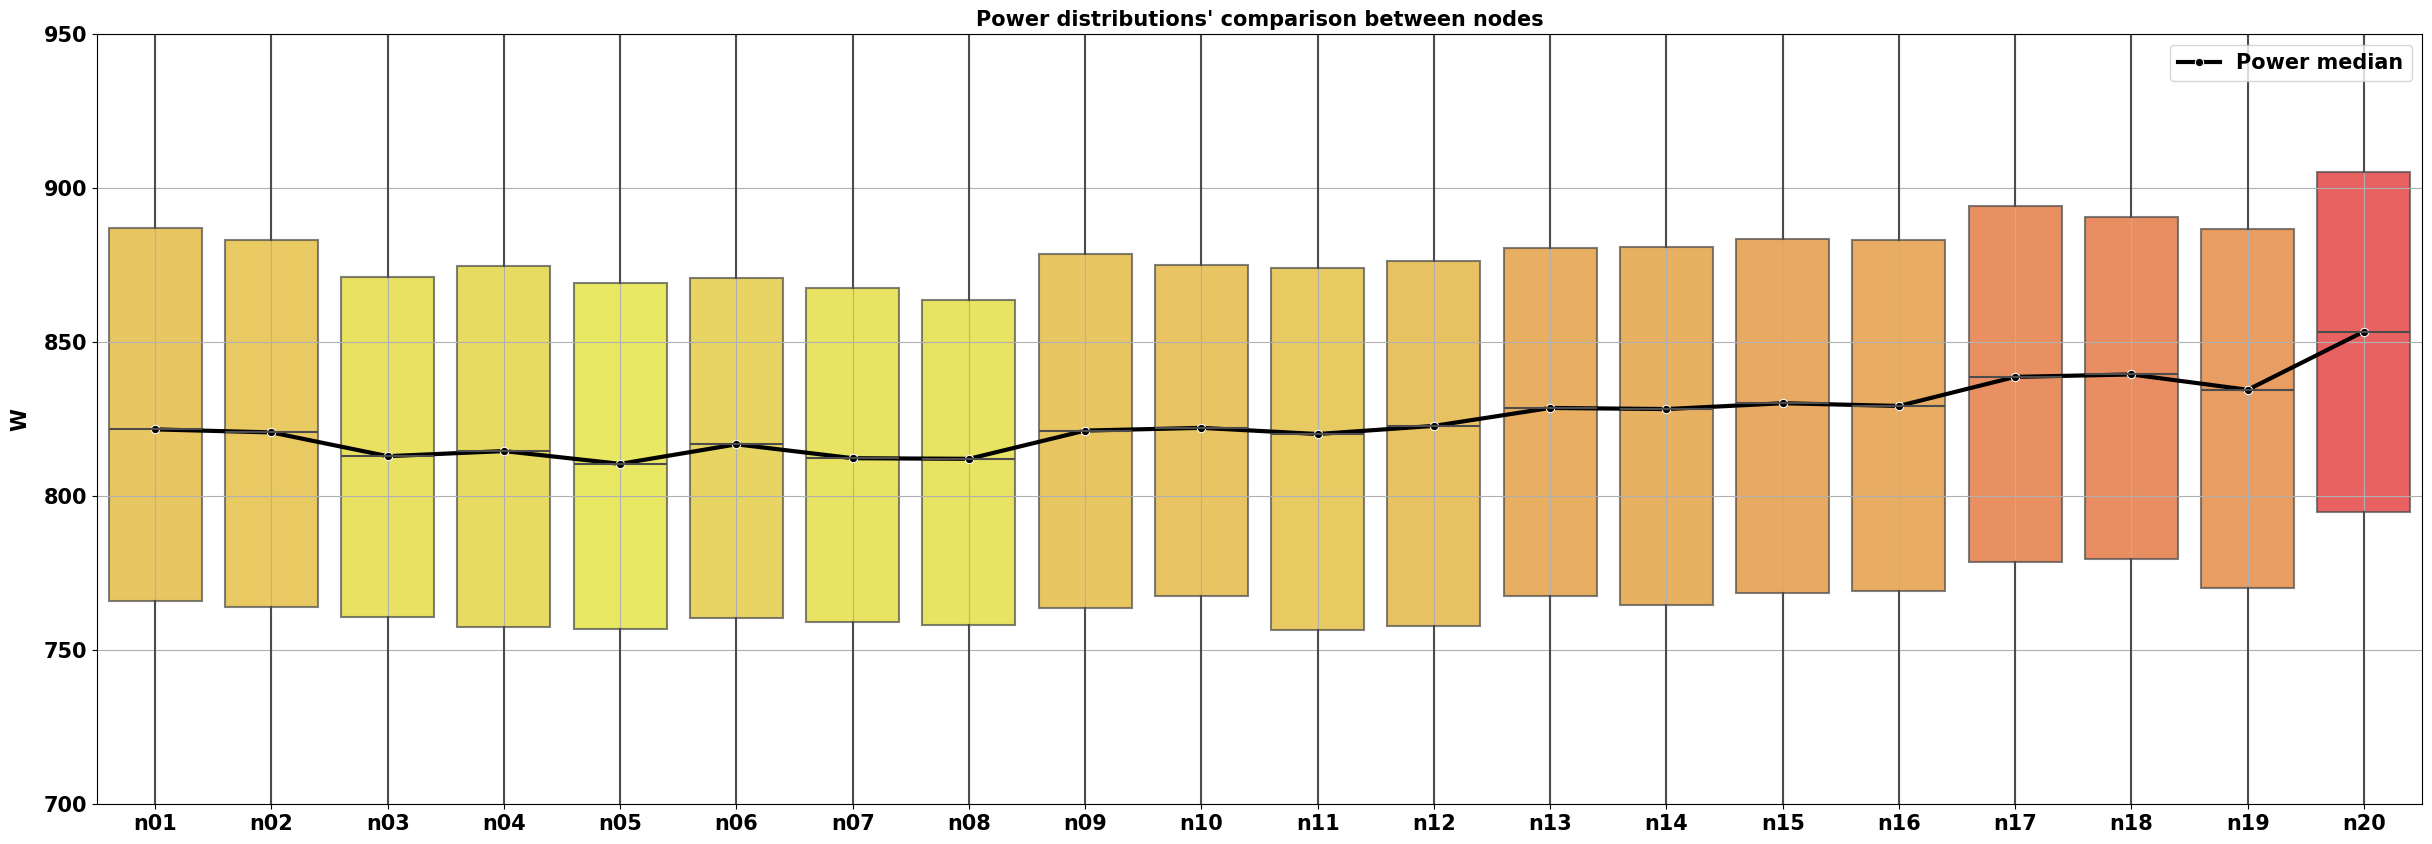

In [10]:
# Creation of individual nodes' dataset and plotting as a boxplot
dataset_P_nodes = pd.DataFrame()

for i in range(1, 21):
    if (i < 10):
        node_nbr = "n0" + str(i)
    else:
        node_nbr = "n" + str(i)
    node = [col for col in dataset_P.columns if node_nbr in col]
    if not node:
        continue # Skipping a cycle if the node number isn't present
    new_node = dataset_P[node].mean(axis=1)
    dataset_P_nodes[node_nbr] = new_node

#print(dataset_P_nodes)

mx=dataset_P_nodes.median()
# Color map creation
cmap = LinearSegmentedColormap.from_list("custom_cmap", ["yellow", "red"])
normalize = plt.Normalize(mx.min(), mx.max())
colors = [cmap(normalize(value)) for value in mx]

fig, ax = plt.subplots(figsize=(30,10))
sns.boxplot(data=dataset_P_nodes, ax=ax, palette=colors, boxprops=dict(alpha=0.7))
sns.lineplot(y=mx.values, x=mx.index, ax=ax, linestyle='-', color='black', linewidth=3, marker='o', label='Power median')
plt.grid(True)
plt.gca().yaxis.labelpad = 10
plt.xticks(fontweight='bold', fontsize=15)
plt.yticks(fontweight='bold', fontsize=15)
plt.ylabel('W', fontweight='bold', fontsize=15)
plt.title("Power distributions' comparison between nodes", fontweight='bold', fontsize=15)
ax.set_ylim(700, 950)
#ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.0f}'.format(x/1000)))
plt.legend(prop={'weight': 'bold', 'size': 15})

plt.savefig('../PLOTS/PWR_nodes_boxplot.png', dpi=300)
plt.show()
    

c:\Users\loren\miniconda3\envs\DeepLearning\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\loren\miniconda3\envs\DeepLearning\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


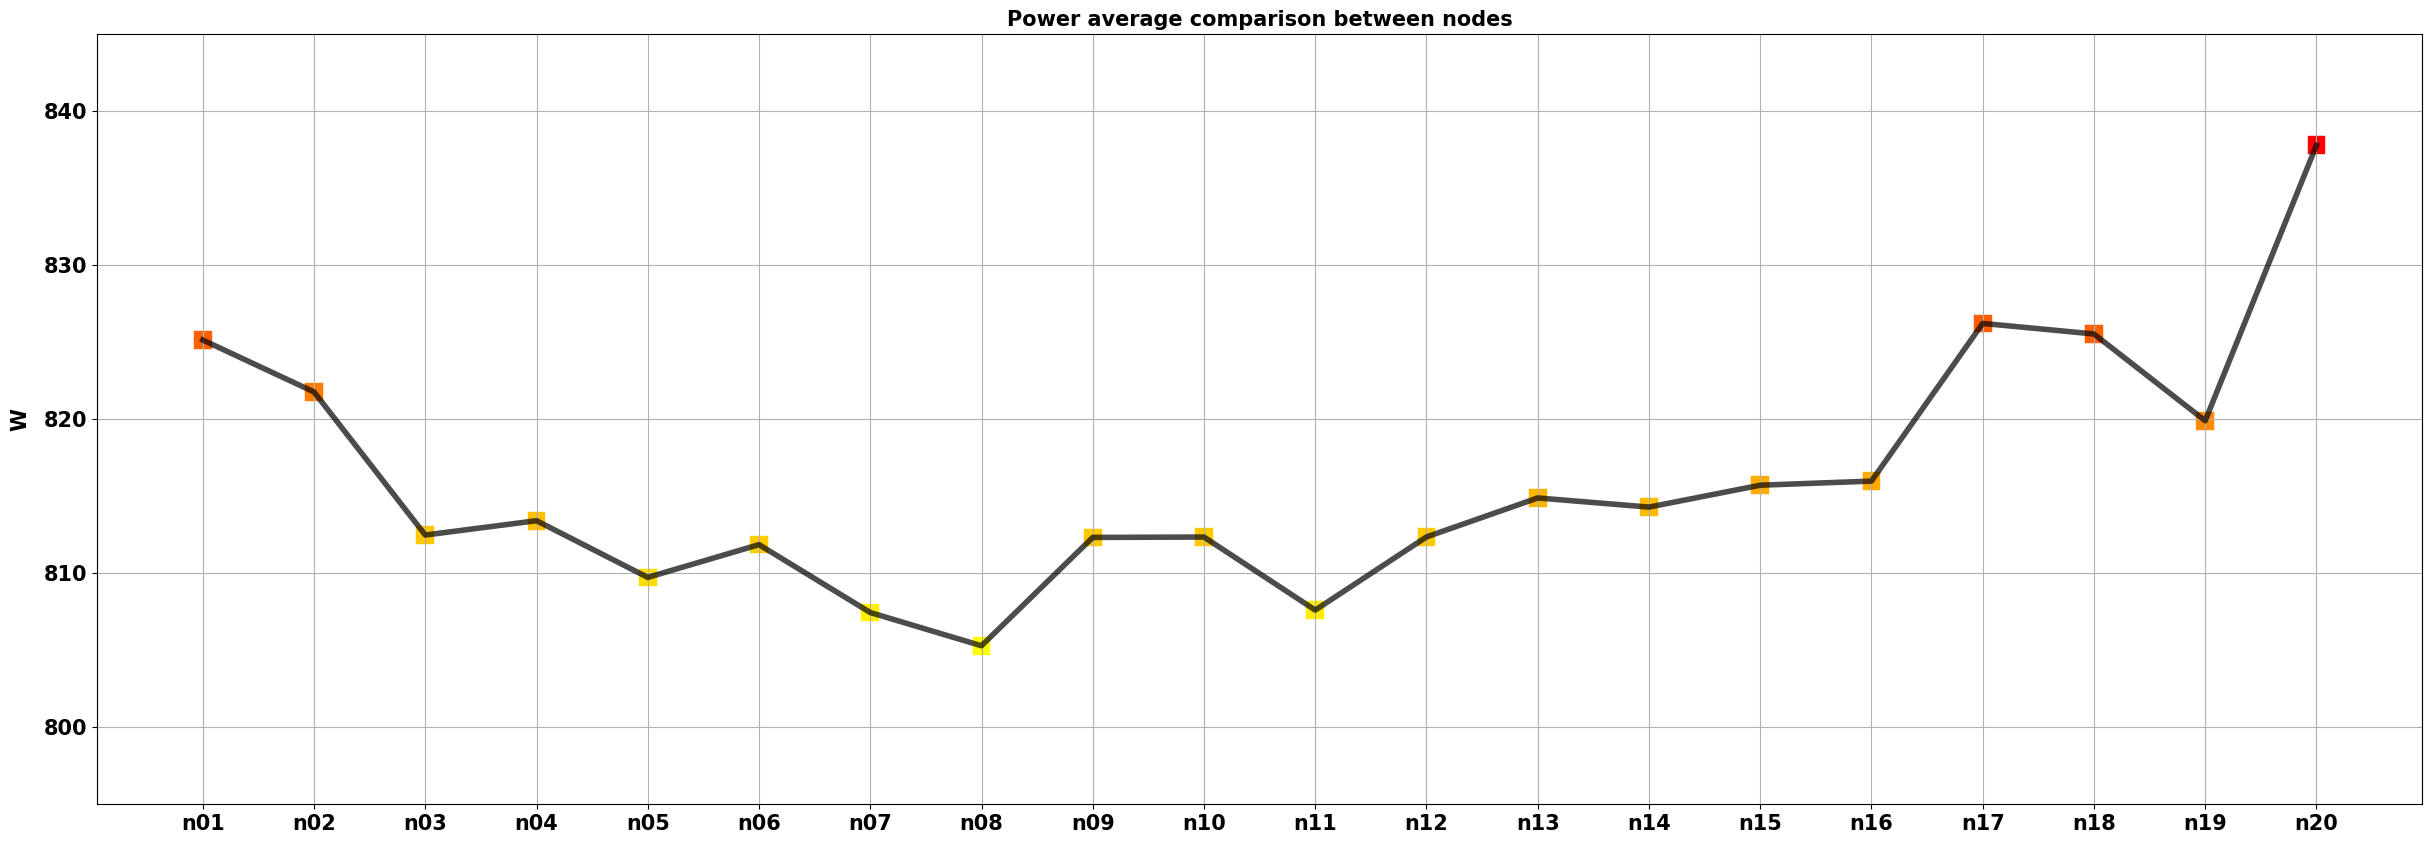

In [52]:
# Creation of individual nodes' dataset and plotting as a lineplot
dataset_P_nodes = pd.DataFrame()
dataset_P_mean_nodes = pd.Series()

for i in range(1, 21):
    if (i < 10):
        node_nbr = "n0" + str(i)
    else:
        node_nbr = "n" + str(i)
    node = [col for col in dataset_P.columns if node_nbr in col]
    if not node:
        continue # Skipping a cycle if the node number isn't present
    new_node = dataset_P[node].mean(axis=1)
    dataset_P_nodes[node_nbr] = new_node
    dataset_P_mean_nodes[node_nbr] = dataset_P_nodes[node_nbr].mean()

fig, ax = plt.subplots(figsize=(30,10))

# Creating a colormap
colors = dataset_P_mean_nodes.values
cmap = LinearSegmentedColormap.from_list("custom_cmap", ["yellow", "red"])

sns.lineplot(data=dataset_P_mean_nodes, ax=ax, c='black', linewidth=4, alpha=0.7)
scatter = sns.scatterplot(data=dataset_P_mean_nodes, ax=ax, s=200, c=colors, cmap=cmap, marker='s')
plt.grid(True)
plt.gca().yaxis.labelpad = 10
plt.xticks(fontweight='bold', fontsize=15)
plt.yticks(fontweight='bold', fontsize=15)
plt.ylabel('W', fontweight='bold', fontsize=15)
plt.title("Power average comparison between nodes", fontweight='bold', fontsize=15)
ax.set_ylim(795, 845)

plt.savefig('../PLOTS/PWR_nodes_mean_plot.png', dpi=300)
plt.show()

To have a complete view of the situation we are going to add an histogram plotting of the temperatures of the nodes

In [49]:
# Dataset import from CSV file
dataset_TEMP_in = pd.read_csv('../TemperatureDataset_inlet.csv', index_col=0, parse_dates=True)
dataset_TEMP_out = pd.read_csv('../TemperatureDataset_outlet.csv', index_col=0, parse_dates=True)

In [50]:
# Creation of individual nodes' datasets
dataset_TEMP_in_nodes = pd.DataFrame()
dataset_TEMP_in_mean_nodes = pd.Series()

dataset_TEMP_out_nodes = pd.DataFrame()
dataset_TEMP_out_mean_nodes = pd.Series()

for i in range(1, 21):
    if (i < 10):
        node_nbr = "n0" + str(i)
    else:
        node_nbr = "n" + str(i)
    node_in = [col for col in dataset_TEMP_in.columns if node_nbr in col]
    if not node_in:
        continue # Skipping a cycle if the node number isn't present
    new_node = dataset_TEMP_in[node_in].mean(axis=1)
    dataset_TEMP_in_nodes[node_nbr] = new_node
    dataset_TEMP_in_mean_nodes[node_nbr] = dataset_TEMP_in_nodes[node_nbr].mean()

for i in range(1, 21):
    if (i < 10):
        node_nbr = "n0" + str(i)
    else:
        node_nbr = "n" + str(i)
    node_out = [col for col in dataset_TEMP_out.columns if node_nbr in col]
    if not node_out:
        continue # Skipping a cycle if the node number isn't present
    new_node = dataset_TEMP_out[node_out].mean(axis=1)
    dataset_TEMP_out_nodes[node_nbr] = new_node
    dataset_TEMP_out_mean_nodes[node_nbr] = dataset_TEMP_out_nodes[node_nbr].mean()

c:\Users\loren\miniconda3\envs\DeepLearning\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\loren\miniconda3\envs\DeepLearning\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


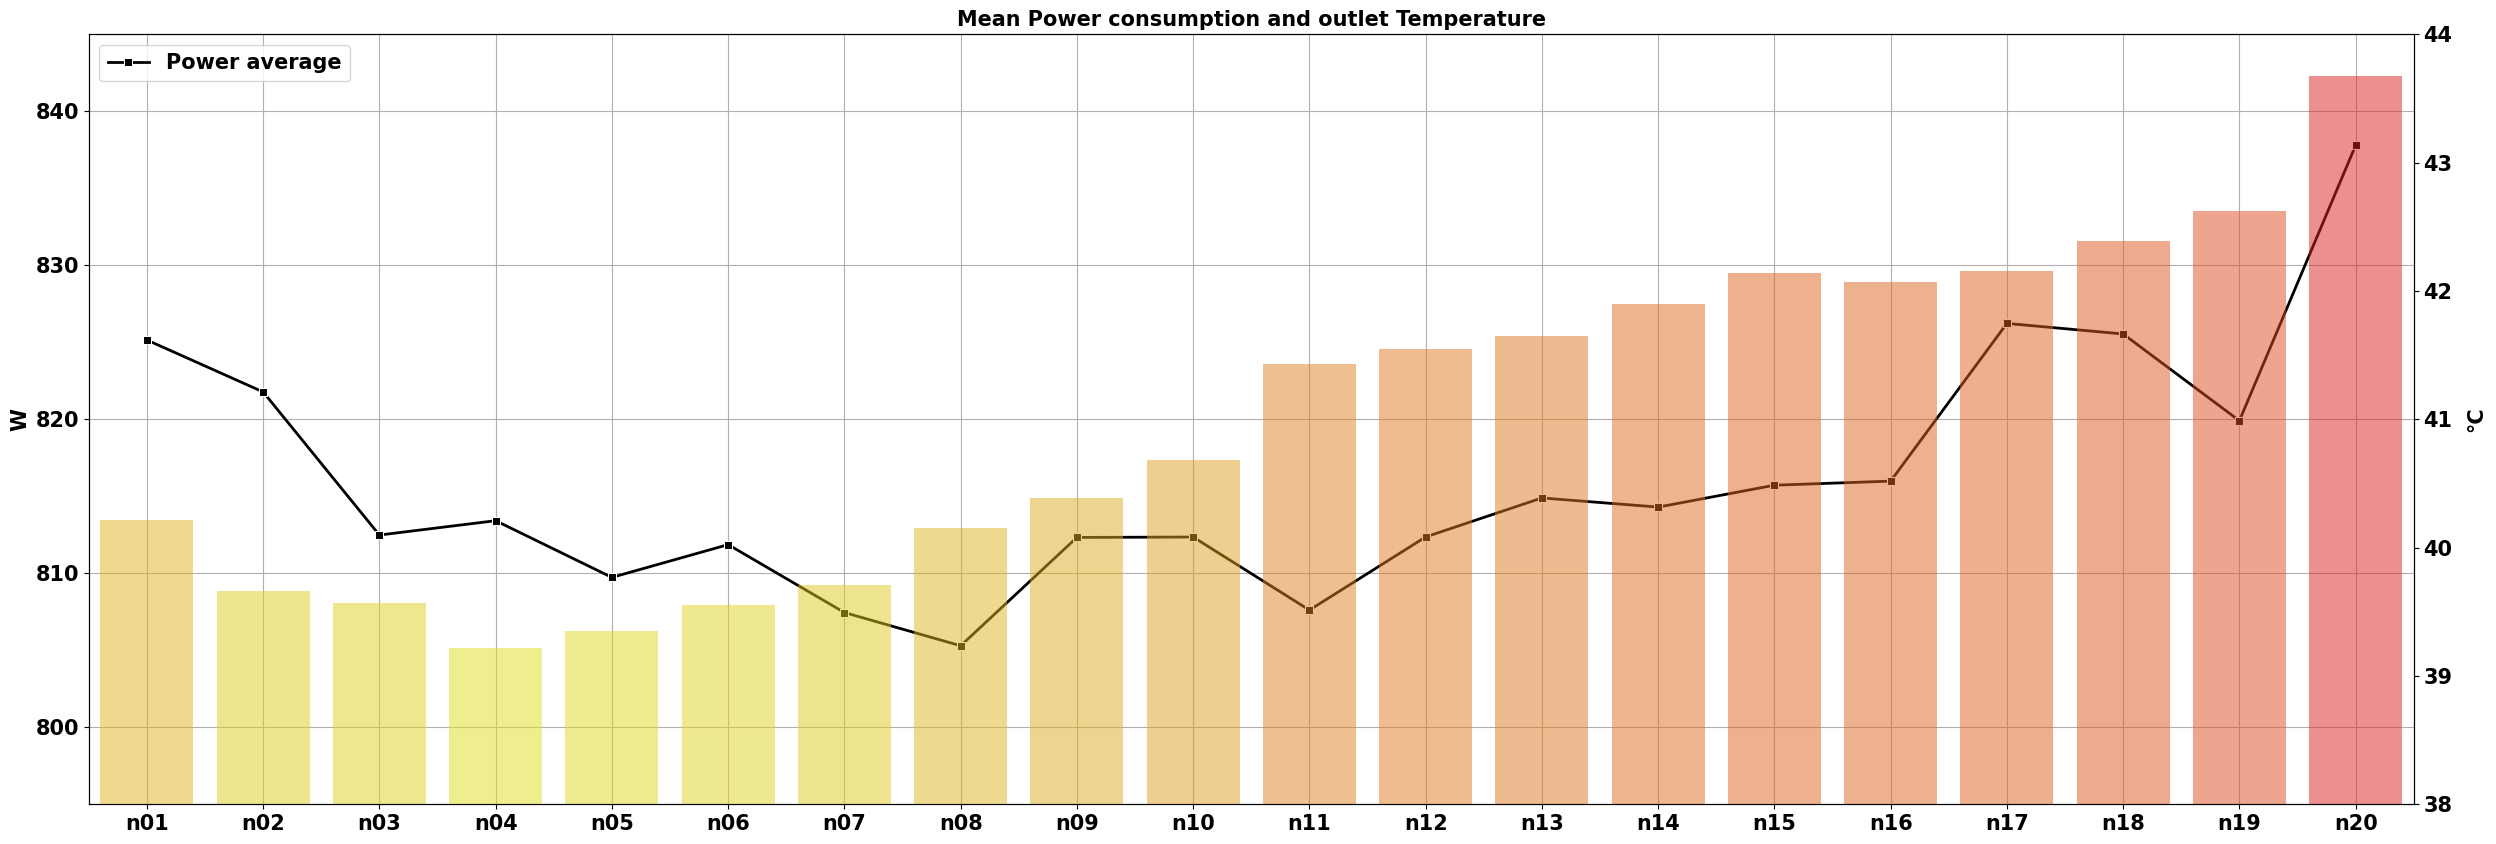

In [61]:
# Color map creation
cmap = LinearSegmentedColormap.from_list("custom_cmap", ["yellow", "red"])
normalize = plt.Normalize(dataset_TEMP_out_mean_nodes.min(), dataset_TEMP_out_mean_nodes.max())
colors1 = [cmap(normalize(value)) for value in dataset_TEMP_out_mean_nodes]

# Plotting everything together
fig, ax1 = plt.subplots(figsize=(30,10))

# Power
sns.lineplot(x=dataset_P_mean_nodes.index, y=dataset_P_mean_nodes.values, ax=ax1, c='black', linewidth=2, marker='s', label='Power average')
plt.grid(True)
plt.xticks(fontweight='bold', fontsize=15)
plt.yticks(fontweight='bold', fontsize=15)
ax1.set_ylabel('W', fontweight='bold', fontsize=15)
plt.title("Mean Power consumption and outlet Temperature", fontweight='bold', fontsize=15)
ax1.set_ylim(795, 845)
plt.legend(prop={'weight': 'bold', 'size': 15}, loc=2)

# Temperature
ax2 = ax1.twinx()
sns.barplot(x=dataset_TEMP_out_mean_nodes.index, y=dataset_TEMP_out_mean_nodes.values, ax=ax2, palette=colors1, alpha=0.5)
ax2.set_ylabel('°C', fontweight='bold', fontsize=15)
ax2.set_ylim(38, 44)
plt.xticks(fontweight='bold', fontsize=15)
plt.yticks(fontweight='bold', fontsize=15)
plt.gca().yaxis.labelpad = 10

plt.savefig('../PLOTS/PWR_TEMPout_nodes_mean_plot.png', dpi=300)
plt.show()

c:\Users\loren\miniconda3\envs\DeepLearning\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\loren\miniconda3\envs\DeepLearning\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


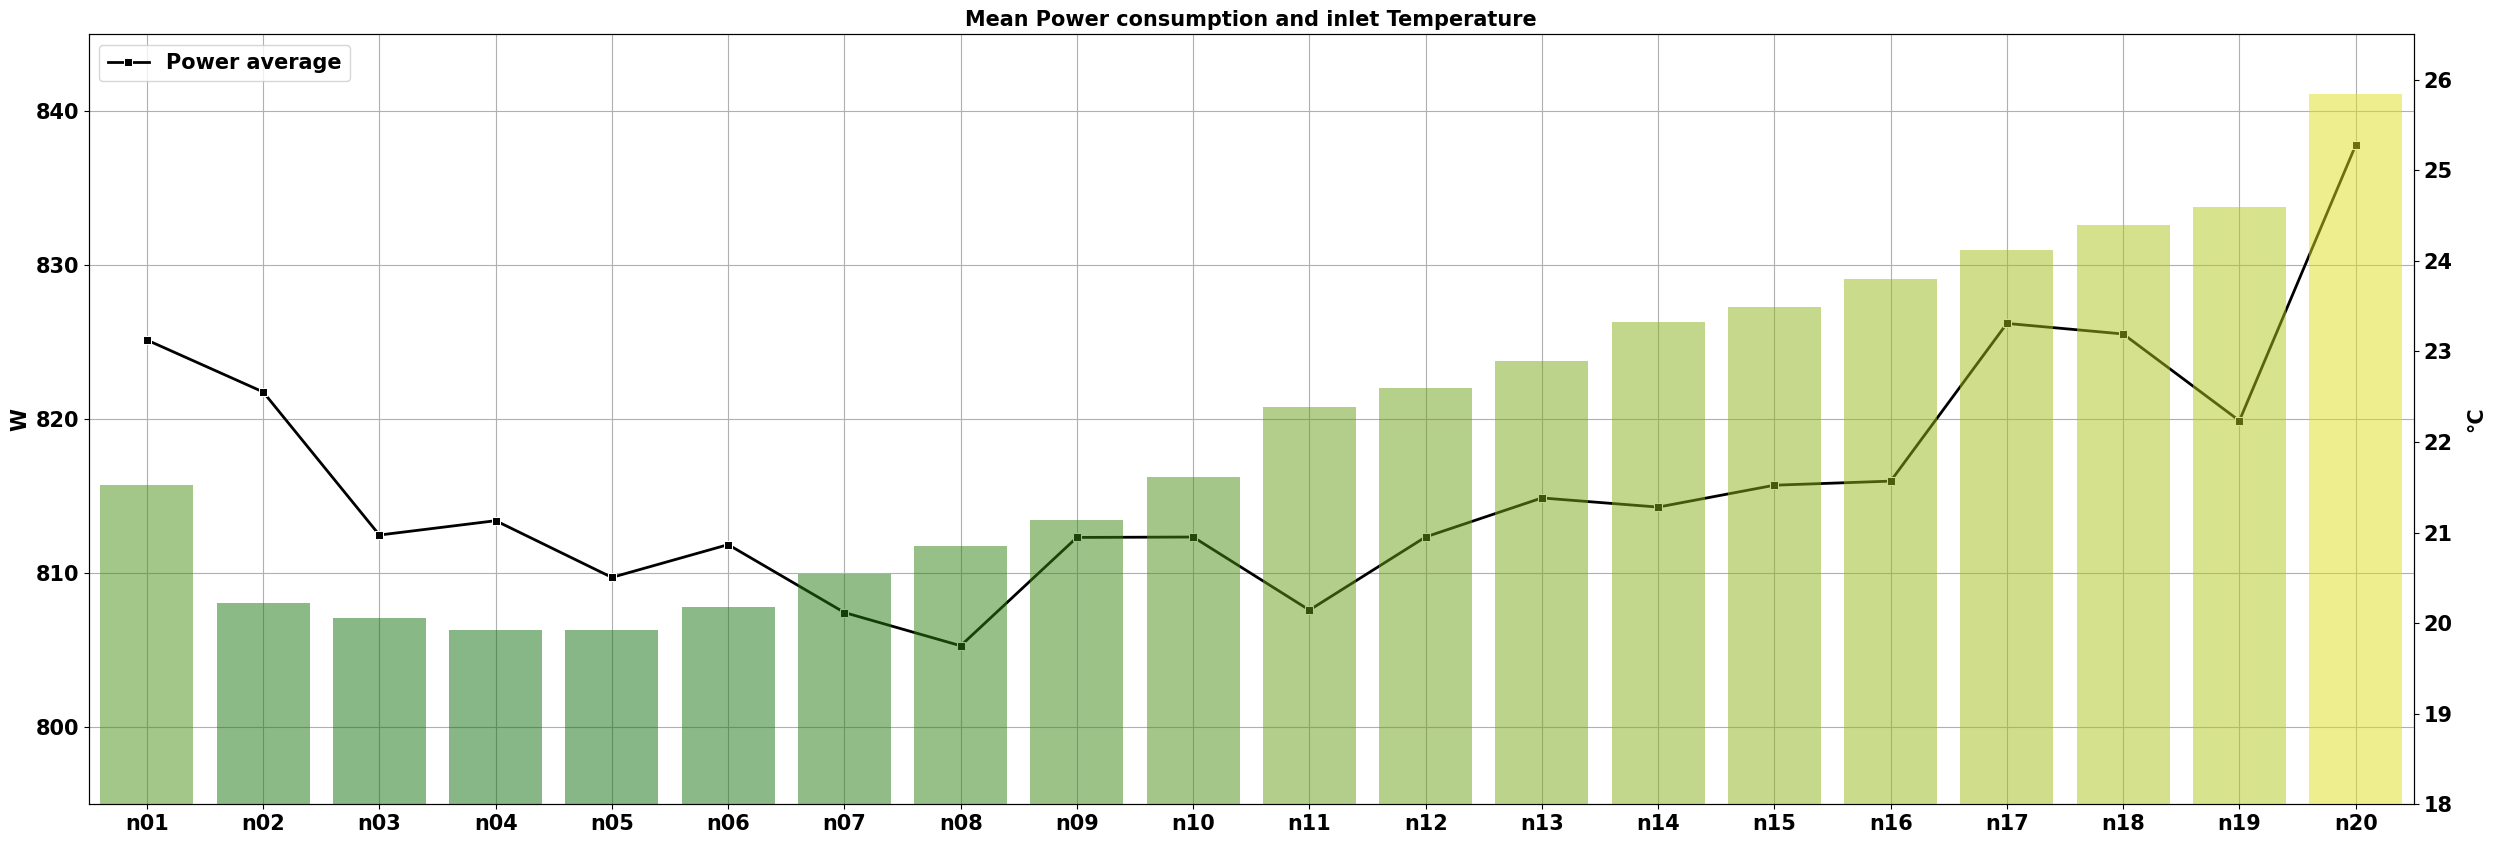

In [62]:
# Color map creation
cmap = LinearSegmentedColormap.from_list("custom_cmap", ["green", "yellow"])
normalize = plt.Normalize(dataset_TEMP_in_mean_nodes.min(), dataset_TEMP_in_mean_nodes.max())
colors2 = [cmap(normalize(value)) for value in dataset_TEMP_in_mean_nodes]

# Plotting everything together
fig, ax1 = plt.subplots(figsize=(30,10))

# Power
sns.lineplot(x=dataset_P_mean_nodes.index, y=dataset_P_mean_nodes.values, ax=ax1, c='black', linewidth=2, marker='s', label='Power average')
plt.grid(True)
plt.xticks(fontweight='bold', fontsize=15)
plt.yticks(fontweight='bold', fontsize=15)
ax1.set_ylabel('W', fontweight='bold', fontsize=15)
plt.title("Mean Power consumption and inlet Temperature", fontweight='bold', fontsize=15)
ax1.set_ylim(795, 845)
plt.legend(prop={'weight': 'bold', 'size': 15}, loc=2)

# Temperature
ax2 = ax1.twinx()
sns.barplot(x=dataset_TEMP_in_mean_nodes.index, y=dataset_TEMP_in_mean_nodes.values, ax=ax2, palette=colors2, alpha=0.5)
ax2.set_ylabel('°C', fontweight='bold', fontsize=15)
ax2.set_ylim(18, 26.5)
plt.xticks(fontweight='bold', fontsize=15)
plt.yticks(fontweight='bold', fontsize=15)
plt.gca().yaxis.labelpad = 10

plt.savefig('../PLOTS/PWR_TEMPin_nodes_mean_plot.png', dpi=300)
plt.show()